Initial Data shape: (1406, 47)
Data shape after cleaning: (1406, 47)


/var/folders/z_/4z9sq5vj56x3v28p4l02_t_w0000gn/T/ipykernel_71746/4192731272.py:26: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(method='nearest', inplace=True)


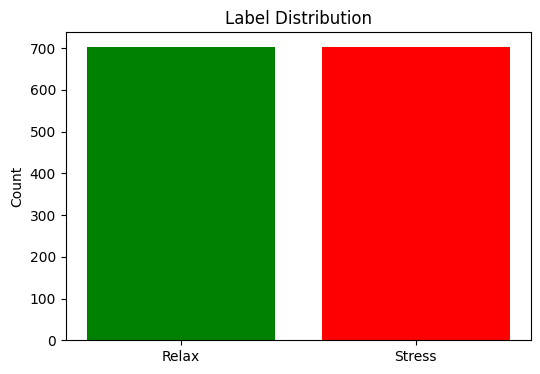

Number of features before selection: 45
Number of features after selection: 35


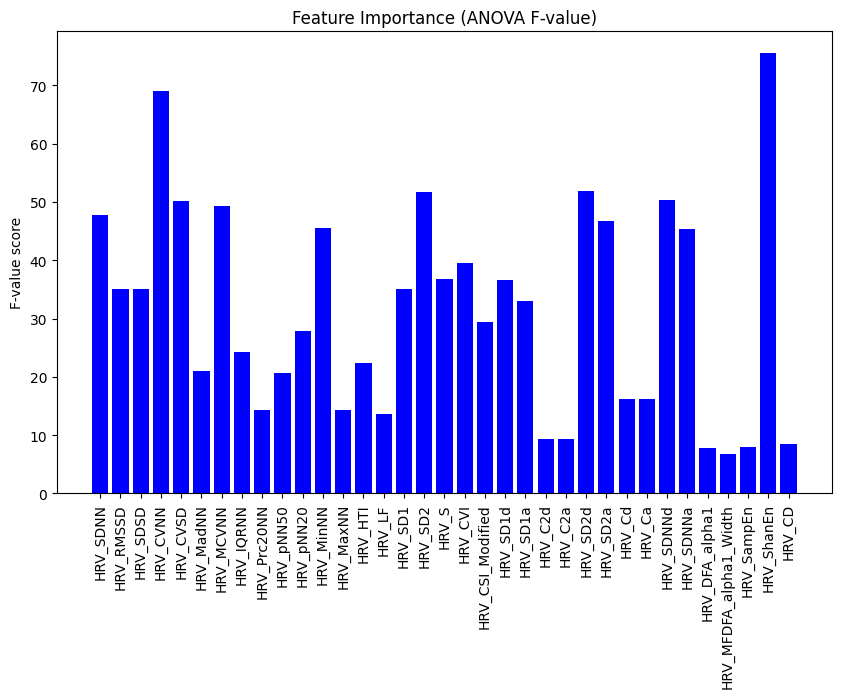

In [1]:
# Import necessary libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

# Define the path to the data folder
# folder = 'PPG_W60000_O55000'
# data_path = './Relax_Stress/'+ 'Process_Python/' + folder + "/data_selected.csv" # Folder where the selected data is stored
data_path = "./Data/PPG_W60000_O50000/data_processed.csv"

# Load the dataset (selected features)
# Using 'data_selected.csv' for training, other commented options are available
data = pd.read_csv(data_path , index_col=False)

# Basic data overview to understand the structure and size of the dataset
print("Initial Data shape:", data.shape)

# Handle missing values and infinite values:
# - Replace infinite values with NaN to ensure correct handling
# - Drop columns with more than 10 missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(thresh=len(data)-10, axis=1, inplace=True)

# Interpolate remaining missing values using the nearest method
data.interpolate(method='nearest', inplace=True)

# Recheck data shape after preprocessing
print("Data shape after cleaning:", data.shape)

# Plot distribution of labels in the dataset
plt.figure(figsize=(6,4))
plt.bar(['Relax', 'Stress'], data['Labels'].value_counts(), color=['green', 'red'])
plt.title('Label Distribution')
plt.ylabel('Count')
plt.show()

# Separate the features and target variable (labels)
X = data.drop(columns=['Labels', 'Subject_id'])  # Features
y = data['Labels']  # Target variable (Labels)

# Feature selection using ANOVA F-value (SelectKBest)
# Select top 35 features based on their ANOVA F-value score
selector = SelectKBest(f_classif, k=35)
X_kbest = selector.fit_transform(X, y)

# Get the selected features and their corresponding scores
selected_columns = selector.get_support(indices=True)
selected_features = X.columns[selected_columns]
print('Number of features before selection:', X.shape[1])
print('Number of features after selection:', X_kbest.shape[1])

# Create a new DataFrame with selected features and append the 'Labels' and 'Subject_id' back
selected_data = pd.concat([data['Subject_id'], data[selected_features], data['Labels']], axis=1)

# Plot feature importance (ANOVA F-values)
plt.figure(figsize=(10,6))
plt.bar(selected_features, selector.scores_[selected_columns], color='blue')
plt.xticks(rotation=90)
plt.title('Feature Importance (ANOVA F-value)')
plt.ylabel('F-value score')
plt.show()


In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from VAE import getUsersEmbedding

embedding_df = getUsersEmbedding()
# Merge the embeddings with the original data (assuming 'Subject_id' is present in both datasets)
final_data = pd.merge(data, embedding_df, on='Subject_id', how='left')

# Step 7: Prepare the data for training and testing

# Features that do not need normalization
#non_normalize_cols = ['Gender', 'Age', 'experience video_game', 'experience VR', 'use stimulants']

# Function to split and process the data, ensuring specific columns are not normalized
def split_train_test_by_subject(X, Y, subject_id):
    """
    Split data for Leave-One-Subject-Out cross-validation.
    """

    X_test = X[X['Subject_id'] == subject_id].copy()
    y_test = Y[Y['Subject_id'] == subject_id].copy()
    X_train = X[X['Subject_id'] != subject_id].copy()
    y_train = Y[Y['Subject_id'] != subject_id].copy()

    # Drop 'Subject_id' column
    X_train.drop(columns='Subject_id', inplace=True)
    X_test.drop(columns='Subject_id', inplace=True)
    
    # Drop 'Subject_id' from labels if necessary
    y_train.drop(columns='Subject_id', errors='ignore', inplace=True)
    y_test.drop(columns='Subject_id', errors='ignore', inplace=True)


    # Normalize features using StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)  # Fit scaler to training data
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    # Map 'Relax' and 'Stress' to 0 and 1
    label_mapping = {'Relax': 0, 'Stress': 1}
    y_train = y_train['Labels'].map(label_mapping)
    y_test = y_test['Labels'].map(label_mapping)
 
    return X_train, y_train, X_test, y_test


Epoch 1, Loss: 3.712552233175798
Epoch 2, Loss: 3.665103164586154
Epoch 3, Loss: 3.591521826657382
Epoch 4, Loss: 3.59584979577498
Epoch 5, Loss: 3.499028281732039
Epoch 6, Loss: 3.512448711828752
Epoch 7, Loss: 3.531925764950839
Epoch 8, Loss: 3.516355525363575
Epoch 9, Loss: 3.3917045268145474
Epoch 10, Loss: 3.4290193752809004
Epoch 11, Loss: 3.4823484420776367
Epoch 12, Loss: 3.357242540879683
Epoch 13, Loss: 3.318209929899736
Epoch 14, Loss: 3.3768687681718306
Epoch 15, Loss: 3.440883668986234
Epoch 16, Loss: 3.3571350249377163
Epoch 17, Loss: 3.3922619169408623
Epoch 18, Loss: 3.3725328662178735
Epoch 19, Loss: 3.3796799941496416
Epoch 20, Loss: 3.2860981659455732
Epoch 21, Loss: 3.241160587830977
Epoch 22, Loss: 3.3874725970354946
Epoch 23, Loss: 3.2654468579725786
Epoch 24, Loss: 3.325232885100625
Epoch 25, Loss: 3.2959461320530283
Epoch 26, Loss: 3.2573862184177744
Epoch 27, Loss: 3.198551568118009
Epoch 28, Loss: 3.268700881437822
Epoch 29, Loss: 3.2575547261671587
Epoch 30, 

In [3]:
data = final_data #if we want to add the embedding

In [4]:
data

,Subject_id,HRV_SDNN,HRV_RMSSD,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_MFDFA_alpha1_Width,HRV_MFDFA_alpha1_Max,HRV_SampEn,HRV_ShanEn,HRV_CD,HRV_HFD,Labels,embed_0,embed_1,embed_2
0,1,102.913819,113.109270,114.020128,0.103171,0.113392,1013.0,97.8516,0.096596,121.00,...,1.795739,-0.671920,1.421386,5.814846,2.001946,1.920874,Relax,-0.083445,-0.110647,-0.956237
1,1,83.767791,109.462904,110.363107,0.081241,0.106161,1024.0,79.3191,0.077460,98.75,...,2.065760,-0.442333,1.568616,5.700212,1.873355,1.990815,Relax,-0.083445,-0.110647,-0.956237
2,1,87.279873,110.402996,111.359019,0.084474,0.106854,1030.0,71.1648,0.069092,83.00,...,1.804488,-0.386273,1.734601,5.692539,1.852858,1.963127,Relax,-0.083445,-0.110647,-0.956237
3,1,85.219490,90.660572,91.471589,0.083074,0.088378,1030.0,68.1996,0.066213,79.00,...,0.821322,-0.142006,1.475907,5.692539,1.801963,1.895247,Relax,-0.083445,-0.110647,-0.956237
4,1,86.176743,90.125607,90.936225,0.084284,0.088146,1030.0,72.6474,0.070531,103.00,...,0.943284,0.182116,2.079442,5.727627,1.903905,1.854542,Relax,-0.083445,-0.110647,-0.956237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,27,121.748617,159.621226,160.555395,0.165280,0.216694,724.0,97.8516,0.135154,120.50,...,2.509779,-0.003211,1.047969,6.126566,1.580876,1.915298,Stress,-0.119320,-0.064239,-0.761458
1402,27,130.639197,177.826576,178.882480,0.175688,0.239147,746.5,96.3690,0.129094,129.25,...,3.286827,-0.976231,0.860201,6.221928,1.643187,1.934284,Stress,-0.119320,-0.064239,-0.761458
1403,27,132.427919,194.974024,196.221980,0.175906,0.258987,753.0,92.6625,0.123058,121.75,...,2.617152,-0.116189,0.840305,6.096237,1.393465,1.998345,Stress,-0.119320,-0.064239,-0.761458
1404,27,120.834099,186.087380,187.253417,0.162713,0.250582,738.0,84.5082,0.114510,118.50,...,2.106432,0.143099,0.973449,6.177198,1.624039,1.951102,Stress,-0.119320,-0.064239,-0.761458


In [5]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

label_mapping = {'Relax': 0, 'Stress': 1}
data['Labels'] = data['Labels'].map(label_mapping)
y = data['Labels'].values.astype(np.float32)

# Separate features and labels
X = data.drop(columns=['Labels', 'Subject_id']).values
#y = data['Labels'].values


groups = data['Subject_id'].values

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from torch.utils.data import Dataset, DataLoader

class PPGDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.from_numpy(y).float()
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

#  Define the Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.5),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),
            
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.net(x)
    



In [6]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import class_weight
from copy import deepcopy

# ... (Assuming data preparation and model definitions are above)

logo = LeaveOneGroupOut()
accuracy_list = []
f1_list = []

for train_index, test_index in logo.split(X_scaled, y, groups=groups):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Create datasets and data loaders
    train_dataset = PPGDataset(X_train, y_train)
    test_dataset = PPGDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    # Compute class weights (Corrected)
    class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weights = torch.tensor(class_weights, dtype=torch.float)
    
    # Initialize model, criterion, optimizer
    input_dim = X_train.shape[1]
    model = NeuralNet(input_dim)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Early stopping parameters
    best_model_wts = deepcopy(model.state_dict())
    best_f1 = 0.0
    patience = 5
    counter = 0
    num_epochs = 100
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            # Apply class weights
            weights = class_weights[labels.long()]
            loss = criterion(outputs, labels)
            loss = (loss * weights).mean()
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        # Evaluate on validation set
        model.eval()
        y_pred_list = []
        y_true_list = []
        with torch.no_grad():
            for inputs, labels in test_loader:
                outputs = model(inputs).squeeze()
                preds = (outputs >= 0.5).float()
                y_pred_list.extend(preds.numpy())
                y_true_list.extend(labels.numpy())
        f1 = f1_score(y_true_list, y_pred_list)
        
        # Early stopping
        if f1 > best_f1:
            best_f1 = f1
            best_model_wts = deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break
    
    # Load best model weights
    model.load_state_dict(best_model_wts)
    
    # Final evaluation
    model.eval()
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs).squeeze()
            preds = (outputs >= 0.5).float()
            y_pred_list.extend(preds.numpy())
            y_true_list.extend(labels.numpy())
    
    acc = accuracy_score(y_true_list, y_pred_list)
    f1 = f1_score(y_true_list, y_pred_list)
    
    accuracy_list.append(acc)
    f1_list.append(f1)
    
    subject_left_out = groups[test_index[0]]
    print(f'Subject left out: {subject_left_out}')
    print(f'Accuracy: {acc:.4f}, F1-score: {f1:.4f}')

print('\nFinal Results:')
print(f'Average Accuracy: {np.mean(accuracy_list):.4f}')
print(f'Average F1-score: {np.mean(f1_list):.4f}')


Early stopping at epoch 7
Subject left out: 1
Accuracy: 0.8108, F1-score: 0.7941
Early stopping at epoch 9
Subject left out: 2
Accuracy: 0.8919, F1-score: 0.9000
Early stopping at epoch 7
Subject left out: 3
Accuracy: 0.9459, F1-score: 0.9444
Early stopping at epoch 22
Subject left out: 6
Accuracy: 0.5676, F1-score: 0.5789
Early stopping at epoch 20
Subject left out: 7
Accuracy: 0.4730, F1-score: 0.6214
Early stopping at epoch 11
Subject left out: 8
Accuracy: 0.5270, F1-score: 0.6729
Early stopping at epoch 10
Subject left out: 9
Accuracy: 0.5405, F1-score: 0.3704
Early stopping at epoch 6
Subject left out: 10
Accuracy: 0.3919, F1-score: 0.4944
Early stopping at epoch 20
Subject left out: 12
Accuracy: 0.5676, F1-score: 0.6863
Early stopping at epoch 5
Subject left out: 13
Accuracy: 0.2703, F1-score: 0.1562
Early stopping at epoch 9
Subject left out: 14
Accuracy: 0.5405, F1-score: 0.3462
Early stopping at epoch 8
Subject left out: 15
Accuracy: 0.8378, F1-score: 0.8571
Early stopping at 